In [474]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Adathalmaz beolvasása

In [475]:
df = pd.read_csv("Dataset_Ingatlan_USA_meres.csv", delimiter = "|")

In [476]:
pd.set_option('display.max_rows', None)

In [477]:
df.head()

,rowid,year,month,address,suburban,iprice,number_of_bedrooms,number_of_bathrooms,number_of_garage,land_area,...,build_year,CBD_distance,nearest_station,nearest_station_distance,postcode,lat_coord,long_coord,nearest_school,nearest_school_distance,nearest_school_rank
0,0,2023,9,1 Acorn Place,South Lake,565000.0,4,2,2.0,600,...,2003.0,18300,Cockburn Central Station,1800,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1,2024,2,1 Addis Way,Wandi,365000.0,3,2,2.0,351,...,2013.0,26900,Kwinana Station,4900,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,2,2020,6,1 Ainsley Court,Camillo,287000.0,3,1,1.0,719,...,1979.0,22600,Challis Station,1900,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,3,2023,7,1 Albert Street,Bellevue,255000.0,2,1,2.0,651,...,1953.0,17900,Midland Station,3600,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,4,2021,11,1 Aman Place,Lockridge,325000.0,4,1,2.0,466,...,1998.0,11200,Bassendean Station,2000,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


Sorok, oszlopok

In [478]:
num_rows, num_columns = df.shape

print("sorok:", num_rows)
print("oszlopok:", num_columns)

sorok: 33606
oszlopok: 21


Adattípusok

In [479]:
df.dtypes

rowid                         int64
year                          int64
month                         int64
address                      object
suburban                     object
iprice                      float64
number_of_bedrooms            int64
number_of_bathrooms           int64
number_of_garage            float64
land_area                     int64
floor_area                    int64
build_year                  float64
CBD_distance                  int64
nearest_station              object
nearest_station_distance      int64
postcode                      int64
lat_coord                   float64
long_coord                  float64
nearest_school               object
nearest_school_distance     float64
nearest_school_rank         float64
dtype: object

Null értékek

In [480]:
df.isnull().sum()

rowid                           0
year                            0
month                           0
address                         0
suburban                        0
iprice                       5255
number_of_bedrooms              0
number_of_bathrooms             0
number_of_garage             2473
land_area                       0
floor_area                      0
build_year                   3145
CBD_distance                    0
nearest_station                 0
nearest_station_distance        0
postcode                        0
lat_coord                       0
long_coord                      0
nearest_school                  0
nearest_school_distance         0
nearest_school_rank         10936
dtype: int64

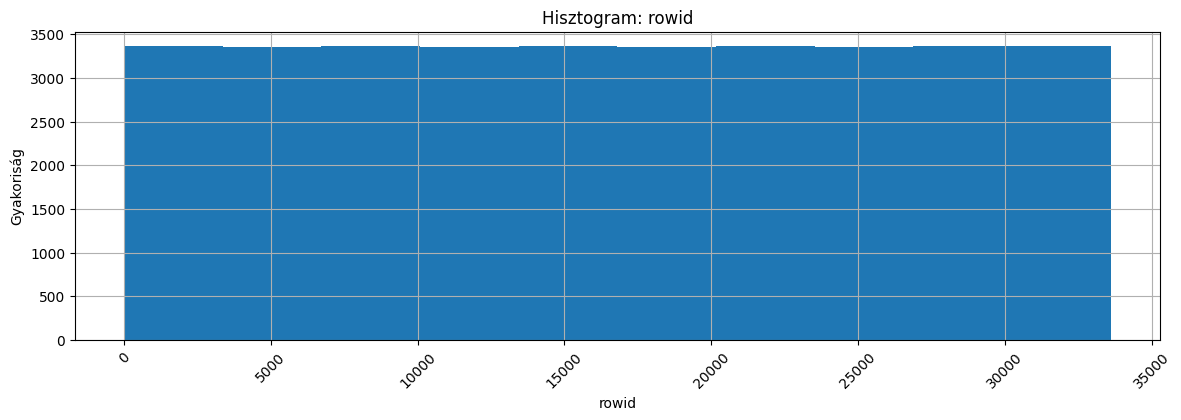

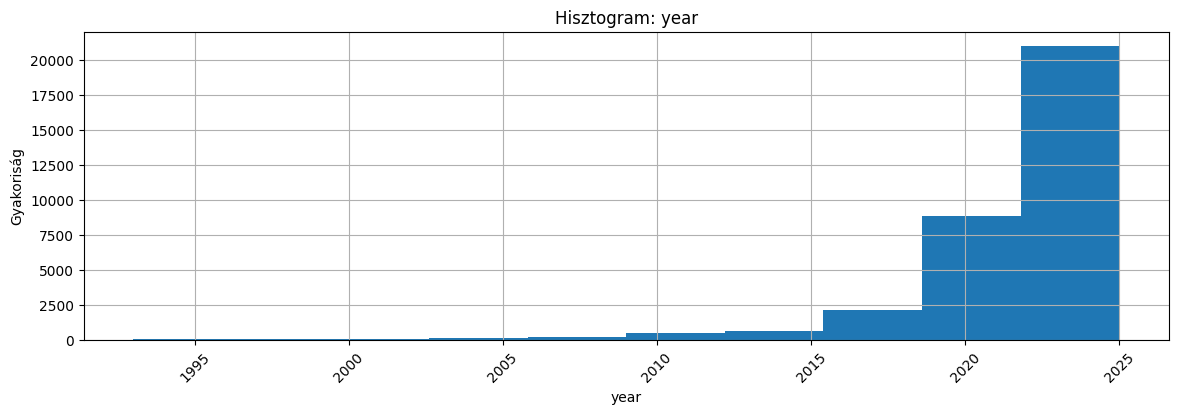

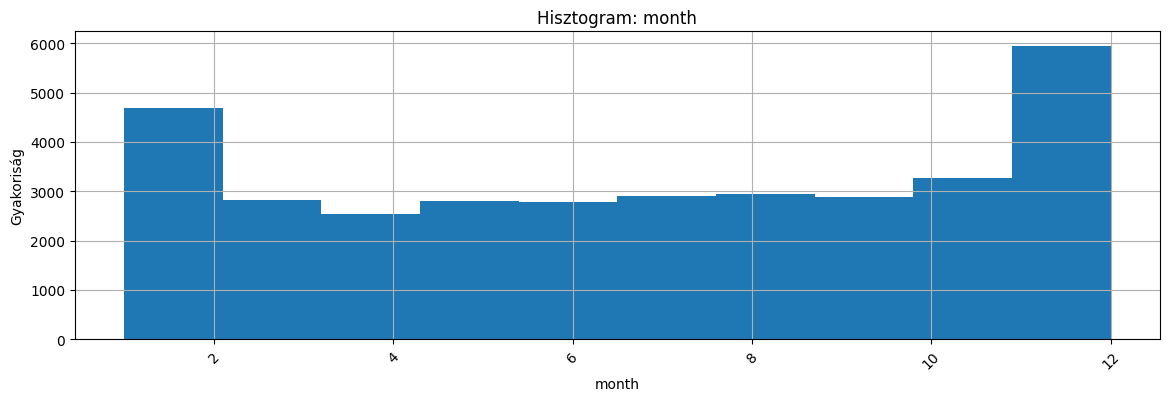

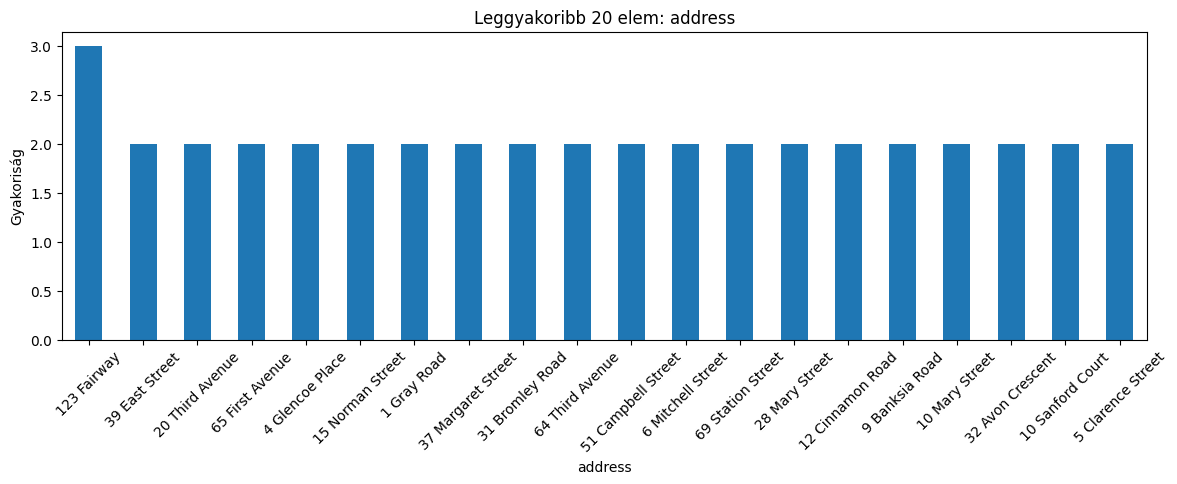

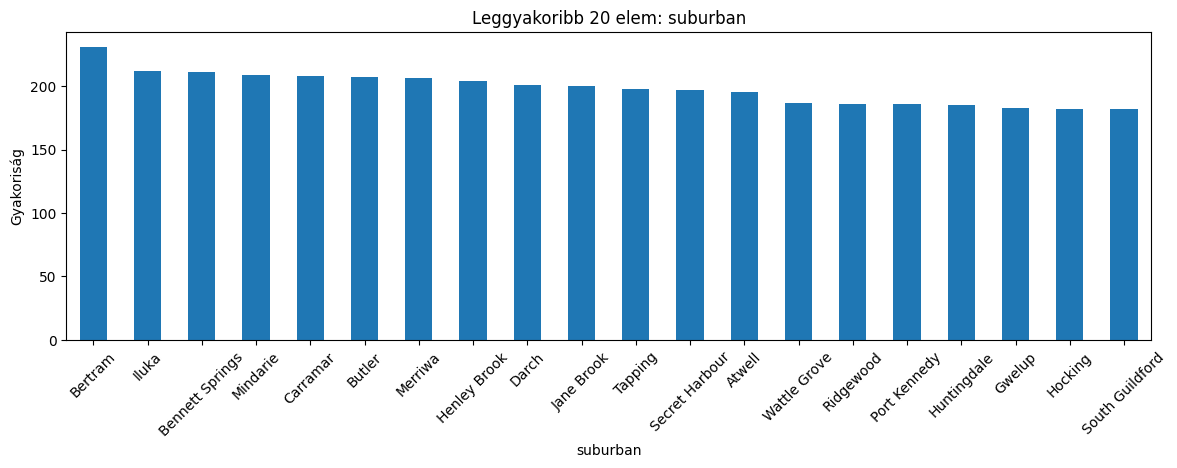

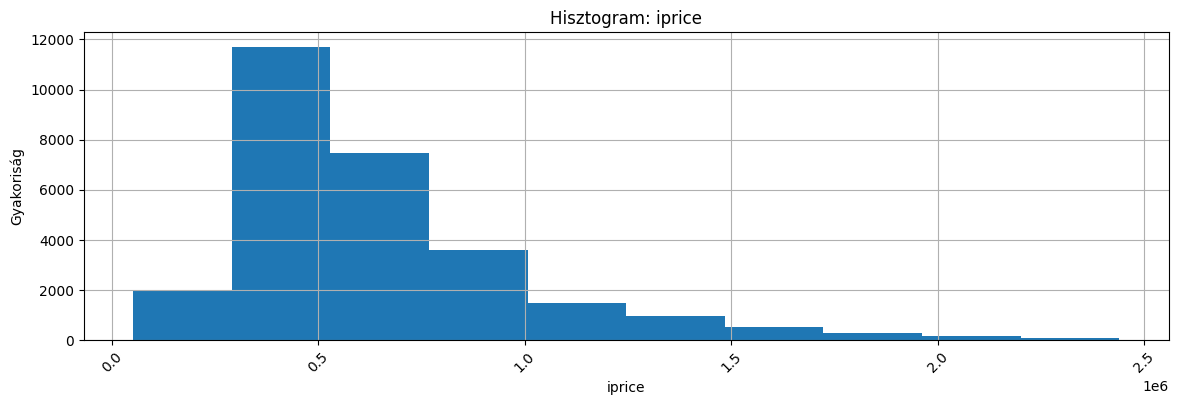

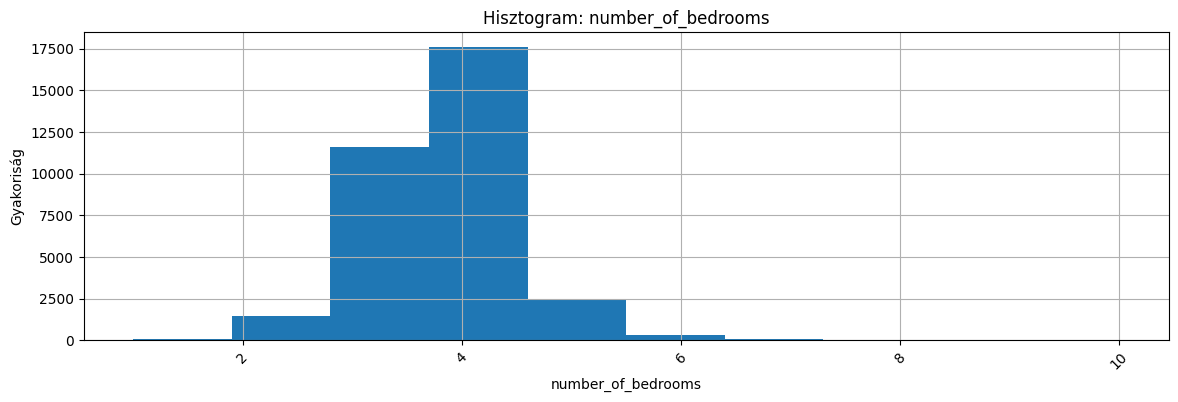

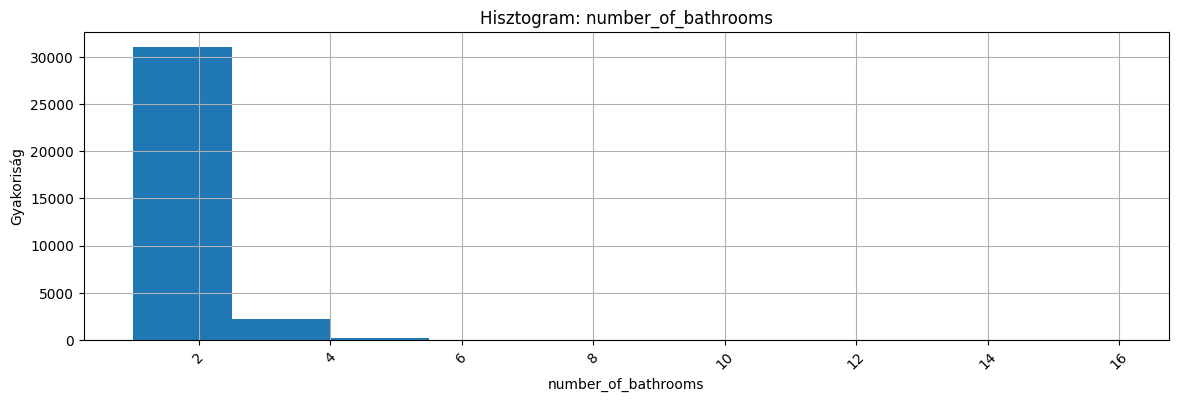

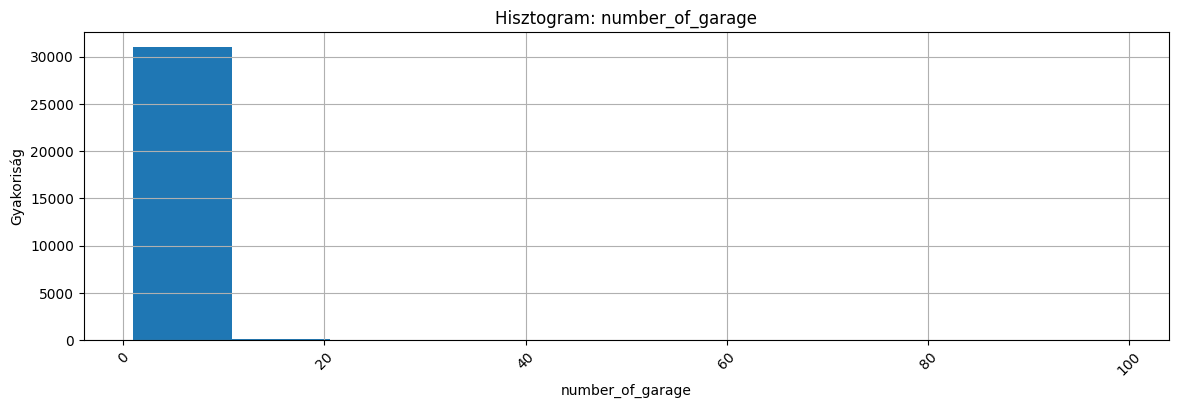

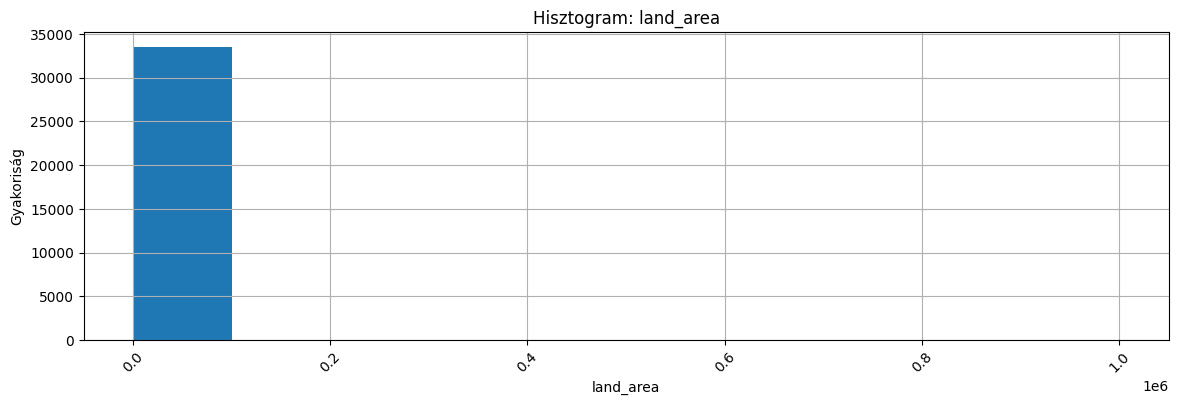

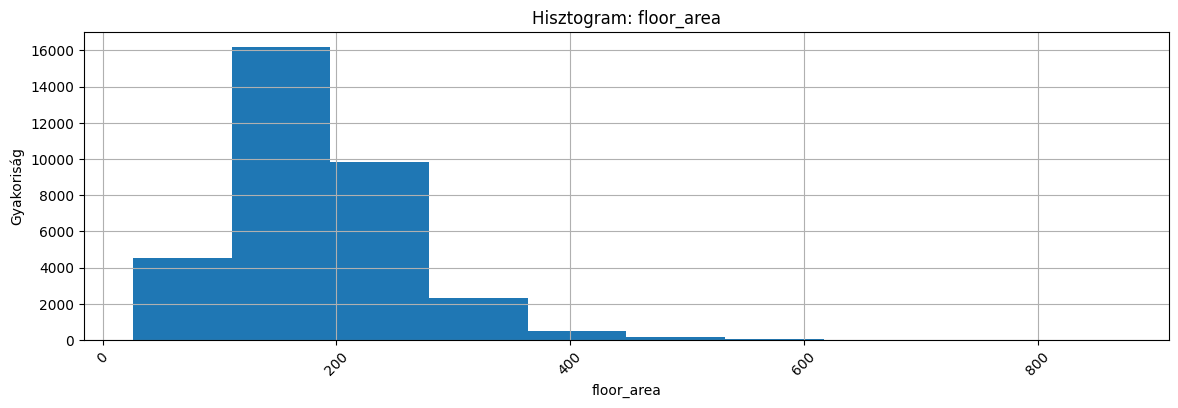

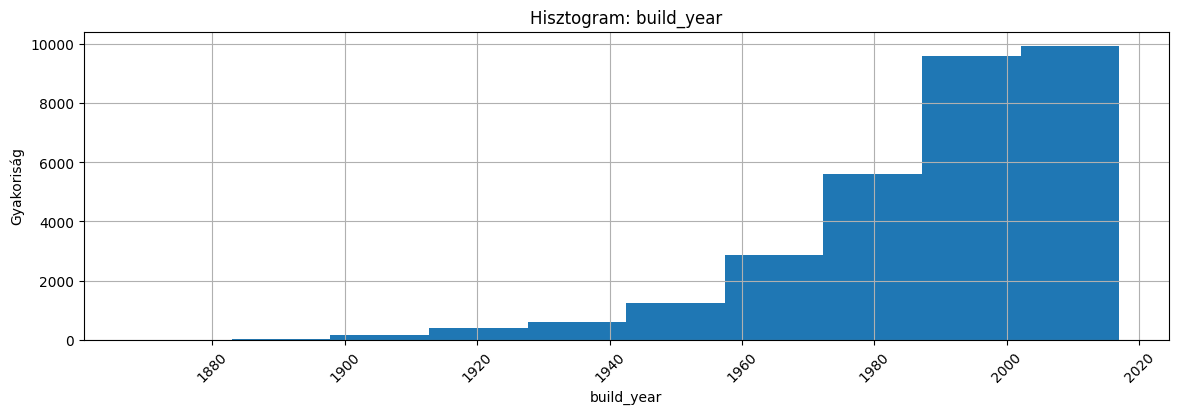

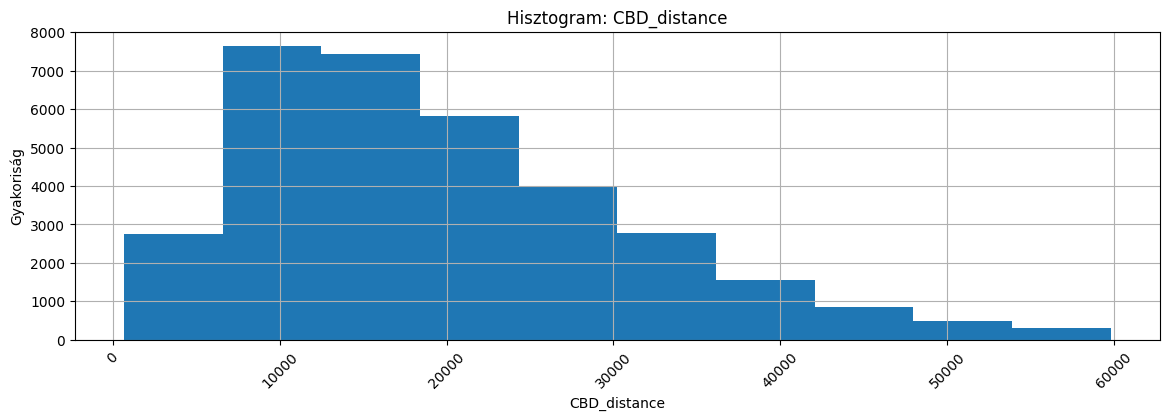

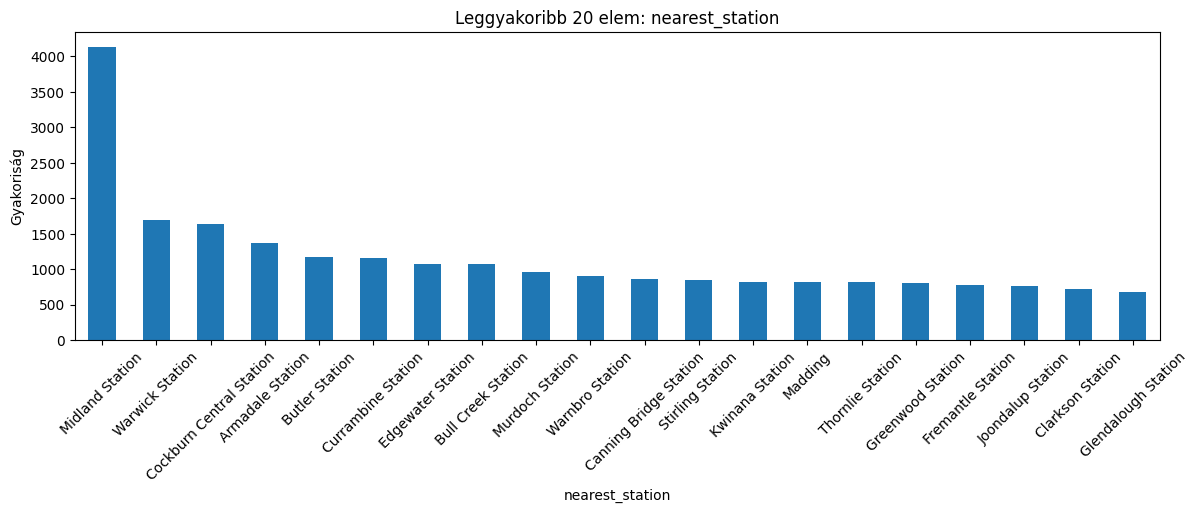

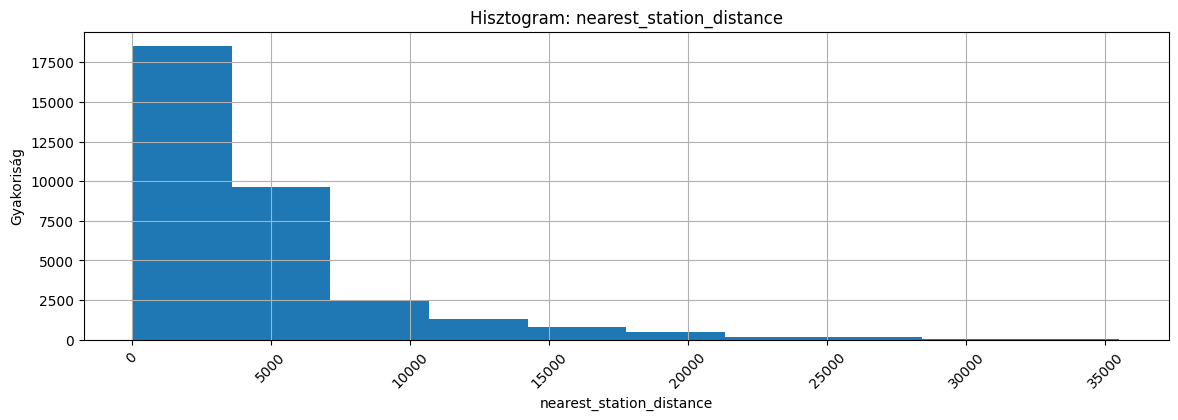

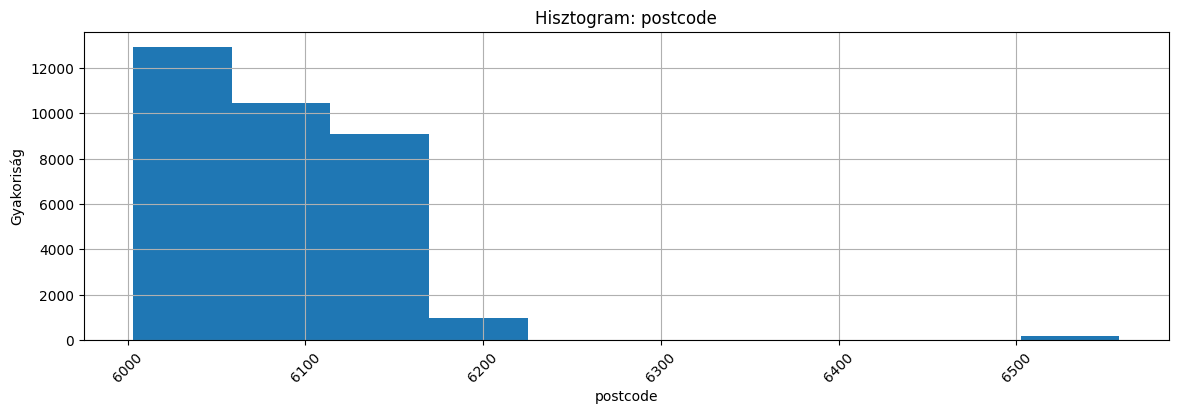

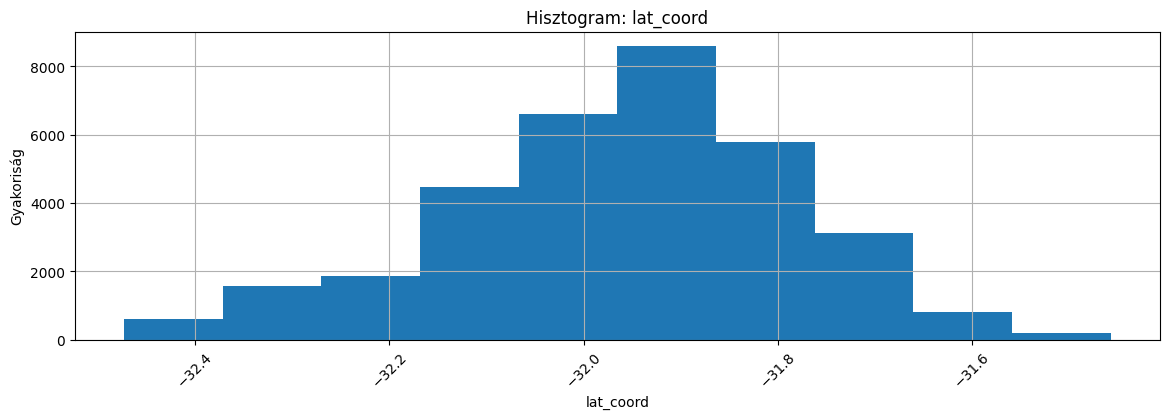

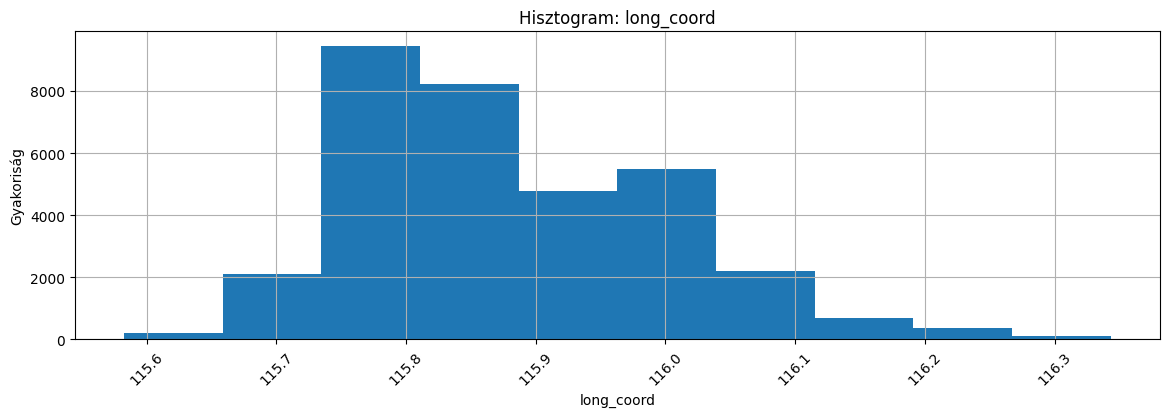

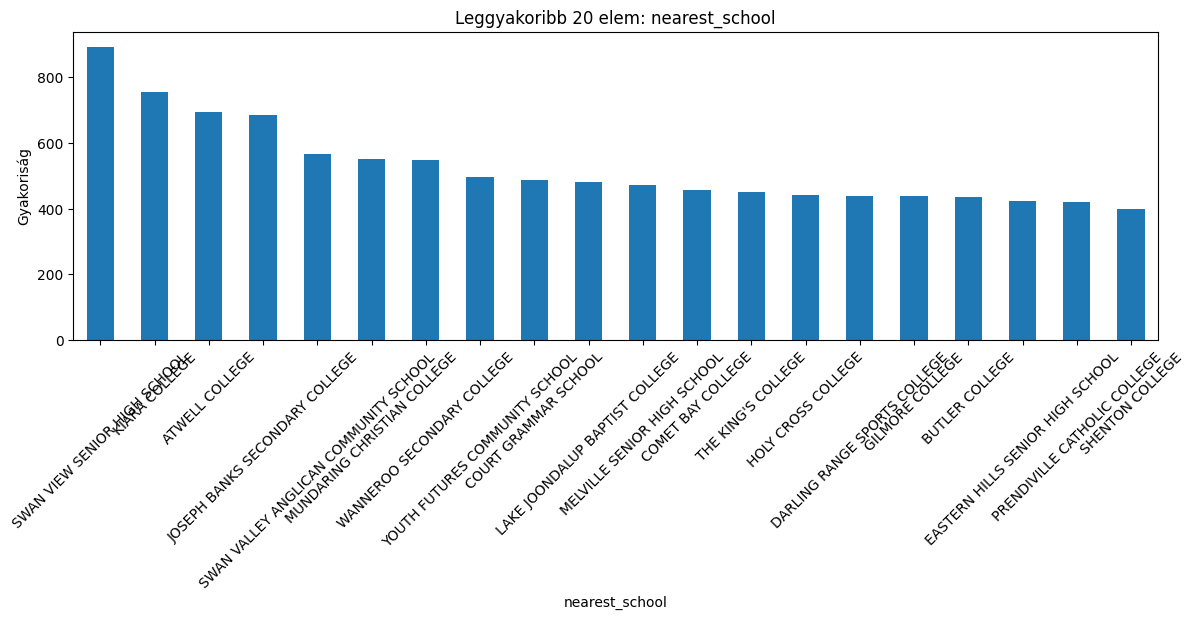

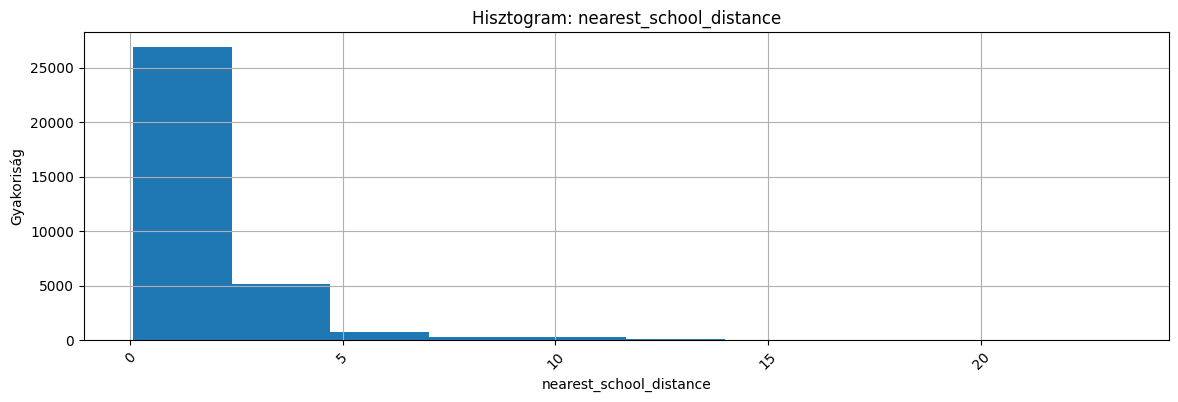

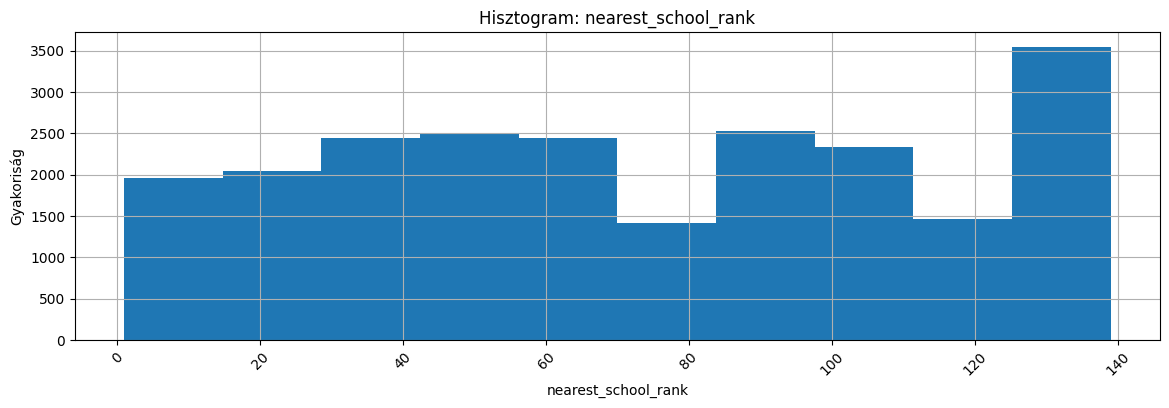

In [481]:
for column in df.columns:
    plt.figure(figsize=(14, 4))
    
    if df[column].dtype in ['int64', 'float64']:  # Ha numerikus adat
        df[column].hist()
        plt.title(f'Hisztogram: {column}')
        plt.xlabel(column)
        plt.ylabel('Gyakoriság')
    
    else:  # Ha szöveges adat
        df[column].value_counts().nlargest(20).plot(kind='bar')
        plt.title(f'Leggyakoribb 20 elem: {column}')
        plt.xlabel(column)
        plt.ylabel('Gyakoriság')
    
    plt.xticks(rotation=45)
    plt.show()

In [482]:
df.columns

Index(['rowid', 'year', 'month', 'address', 'suburban', 'iprice',
       'number_of_bedrooms', 'number_of_bathrooms', 'number_of_garage',
       'land_area', 'floor_area', 'build_year', 'CBD_distance',
       'nearest_station', 'nearest_station_distance', 'postcode', 'lat_coord',
       'long_coord', 'nearest_school', 'nearest_school_distance',
       'nearest_school_rank'],
      dtype='object')

Négyzetméterár elkészítése

In [483]:
df["sqm_price"] = df["iprice"] / df["floor_area"]

In [484]:
df.head()

,rowid,year,month,address,suburban,iprice,number_of_bedrooms,number_of_bathrooms,number_of_garage,land_area,...,CBD_distance,nearest_station,nearest_station_distance,postcode,lat_coord,long_coord,nearest_school,nearest_school_distance,nearest_school_rank,sqm_price
0,0,2023,9,1 Acorn Place,South Lake,565000.0,4,2,2.0,600,...,18300,Cockburn Central Station,1800,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,3531.250000
1,1,2024,2,1 Addis Way,Wandi,365000.0,3,2,2.0,351,...,26900,Kwinana Station,4900,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2625.899281
2,2,2020,6,1 Ainsley Court,Camillo,287000.0,3,1,1.0,719,...,22600,Challis Station,1900,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,3337.209302
3,3,2023,7,1 Albert Street,Bellevue,255000.0,2,1,2.0,651,...,17900,Midland Station,3600,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,4322.033898
4,4,2021,11,1 Aman Place,Lockridge,325000.0,4,1,2.0,466,...,11200,Bassendean Station,2000,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,2480.916031


Négyzetméterár eloszlása

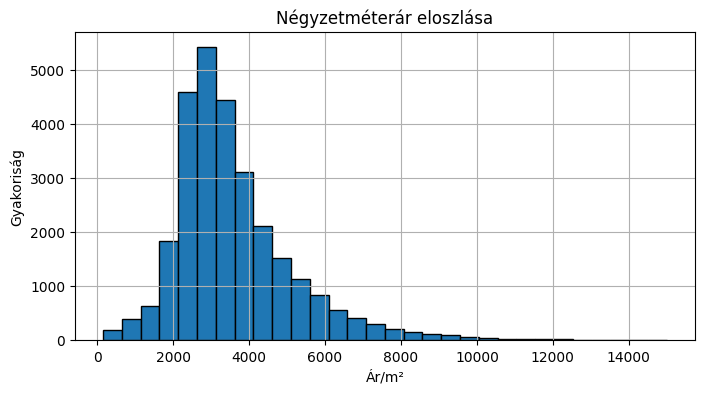

In [485]:
plt.figure(figsize=(8, 4))
df["sqm_price"].hist(bins=30, edgecolor='black')
plt.title("Négyzetméterár eloszlása")
plt.xlabel("Ár/m²")
plt.ylabel("Gyakoriság")
plt.show()

Hány helyen nem lehet kiszámítani

In [486]:
zero_values = (df["floor_area"] == 0).sum()
zero_values

0

Négyzetméter ár változása az évek során

In [487]:
yearly_stats = df.groupby("year")["sqm_price"].agg(["mean", "median"])

In [488]:
print(yearly_stats.head())
yearly_stats.tail()

            mean      median
year                        
1993  449.786762  527.777778
1994  482.461787  328.066698
1995  486.948881  398.009950
1996  610.028358  556.020067
1997  677.659000  594.594595


,mean,median
year,,
2021,3768.231959,3404.255319
2022,3734.941275,3288.135593
2023,3624.134318,3133.802817
2024,3457.279819,2990.196078
2025,NaN,NaN


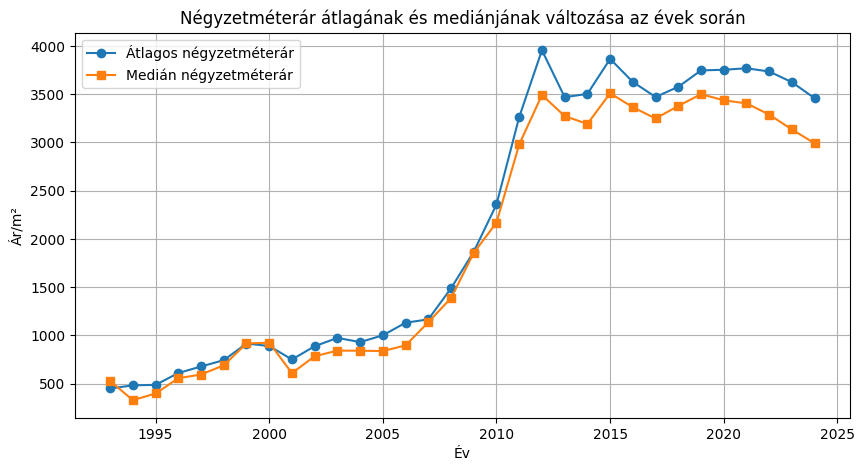

In [489]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_stats.index, yearly_stats["mean"], label="Átlagos négyzetméterár", marker='o')
plt.plot(yearly_stats.index, yearly_stats["median"], label="Medián négyzetméterár", marker='s')
plt.xlabel("Év")
plt.ylabel("Ár/m²")
plt.title("Négyzetméterár átlagának és mediánjának változása az évek során")
plt.legend()
plt.grid(True)
plt.show()

In [490]:
def adjust_sqm_price(row, yearly_stats):
    current_mean = yearly_stats.loc[row["year"], "mean"]
    current_median = yearly_stats.loc[row["year"], "median"]
    target_mean = yearly_stats.loc[2024, "mean"]
    target_median = yearly_stats.loc[2024, "median"]

    mean_factor = target_mean / current_mean
    median_factor = target_median / current_median

    scaling_factor = (mean_factor + median_factor) / 2

    return row["sqm_price"] * scaling_factor



In [491]:
df["2024-re normalizált célváltozó"] =  df.apply(lambda row: adjust_sqm_price(row, yearly_stats), axis=1)

In [492]:
df.head()

,rowid,year,month,address,suburban,iprice,number_of_bedrooms,number_of_bathrooms,number_of_garage,land_area,...,nearest_station,nearest_station_distance,postcode,lat_coord,long_coord,nearest_school,nearest_school_distance,nearest_school_rank,sqm_price,2024-re normalizált célváltozó
0,0,2023,9,1 Acorn Place,South Lake,565000.0,4,2,2.0,600,...,Cockburn Central Station,1800,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,3531.250000,3369.051047
1,1,2024,2,1 Addis Way,Wandi,365000.0,3,2,2.0,351,...,Kwinana Station,4900,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2625.899281,2625.899281
2,2,2020,6,1 Ainsley Court,Camillo,287000.0,3,1,1.0,719,...,Challis Station,1900,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,3337.209302,2989.000433
3,3,2023,7,1 Albert Street,Bellevue,255000.0,2,1,2.0,651,...,Midland Station,3600,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,4322.033898,4123.512306
4,4,2021,11,1 Aman Place,Lockridge,325000.0,4,1,2.0,466,...,Bassendean Station,2000,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,2480.916031,2227.677426


In [493]:
adjusted_stats = df.groupby("year")["2024-re normalizált célváltozó"].agg(["mean", "median"])

# Get the target 2024 mean and median
target_mean = adjusted_stats.loc[2024, "mean"]
target_median = adjusted_stats.loc[2024, "median"]

# Define the 5% tolerance range
mean_lower_bound = target_mean * 0.95
mean_upper_bound = target_mean * 1.05
median_lower_bound = target_median * 0.95
median_upper_bound = target_median * 1.05

# Check if all years are within the tolerance range
adjusted_stats["mean_within_range"] = adjusted_stats["mean"].between(mean_lower_bound, mean_upper_bound)
adjusted_stats["median_within_range"] = adjusted_stats["median"].between(median_lower_bound, median_upper_bound)

adjusted_stats


,mean,median,mean_within_range,median_within_range
year,,,,
1993,3002.803646,3523.476391,False,False
1994,3927.362537,2670.546960,False,False
1995,3557.831157,2908.009971,True,True
1996,3368.962366,3070.694429,True,True
1997,3432.601990,3011.849010,True,True
1998,3339.599194,3099.413036,True,True
1999,3221.678277,3226.122637,False,False
2000,3168.672267,3289.839752,False,False
2001,3569.927696,2898.727694,True,True


In [494]:
new_df = df[['year', '2024-re normalizált célváltozó']]
new_df.head()

,year,2024-re normalizált célváltozó
0,2023,3369.051047
1,2024,2625.899281
2,2020,2989.000433
3,2023,4123.512306
4,2021,2227.677426


In [495]:
new_df_2 = new_df.groupby("year")["2024-re normalizált célváltozó"].agg(["mean", "median"])

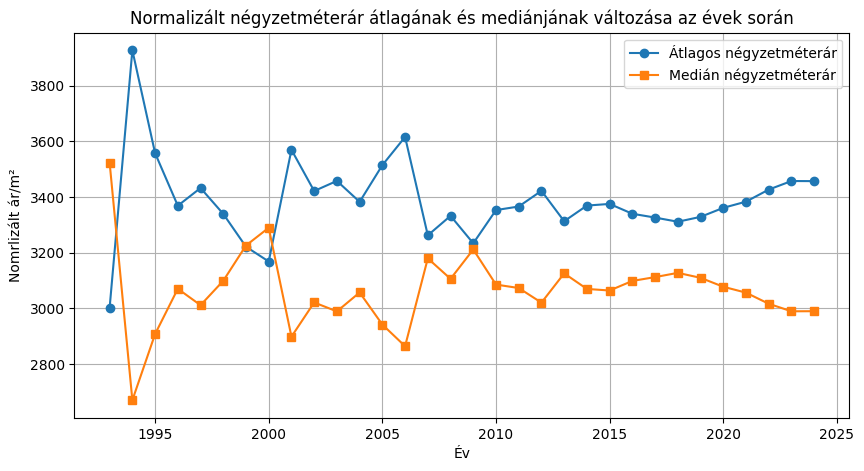

In [496]:
plt.figure(figsize=(10, 5))
plt.plot(new_df_2.index, new_df_2["mean"], label="Átlagos négyzetméterár", marker='o')
plt.plot(new_df_2.index, new_df_2["median"], label="Medián négyzetméterár", marker='s')
plt.xlabel("Év")
plt.ylabel("Nomrlizált ár/m²")
plt.title("Normalizált négyzetméterár átlagának és mediánjának változása az évek során")
plt.legend()
plt.grid(True)
plt.show()

Minimum négyzetméterár 2020 előtt

In [497]:
min_sqm_price_before_2020 = df[df["year"] < 2020]["sqm_price"].min()
min_sqm_price_before_2020

154.36241610738256

Medián négyzetméterár 2017-ben

In [498]:
median_sqm_price_in_2017 = df[df["year"] < 2017]["sqm_price"].median()
median_sqm_price_in_2017

2763.9751552795033

In [499]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = [col for col in df.select_dtypes(include=["object"]).columns if df[col].nunique() <= 100]
print(numerical_columns)
print(categorical_columns)

['rowid', 'year', 'month', 'iprice', 'number_of_bedrooms', 'number_of_bathrooms', 'number_of_garage', 'land_area', 'floor_area', 'build_year', 'CBD_distance', 'nearest_station_distance', 'postcode', 'lat_coord', 'long_coord', 'nearest_school_distance', 'nearest_school_rank', 'sqm_price', '2024-re normalizált célváltozó']
['nearest_station']


In [500]:
df.isnull().sum()

rowid                                 0
year                                  0
month                                 0
address                               0
suburban                              0
iprice                             5255
number_of_bedrooms                    0
number_of_bathrooms                   0
number_of_garage                   2473
land_area                             0
floor_area                            0
build_year                         3145
CBD_distance                          0
nearest_station                       0
nearest_station_distance              0
postcode                              0
lat_coord                             0
long_coord                            0
nearest_school                        0
nearest_school_distance               0
nearest_school_rank               10936
sqm_price                          5255
2024-re normalizált célváltozó     5255
dtype: int64

In [501]:
cols = ['rowid', 'year', 'month', 'address', 'suburban', 'iprice',
       'number_of_bedrooms', 'number_of_bathrooms', 'number_of_garage',
       'land_area', 'floor_area', 'build_year', 'CBD_distance',
       'nearest_station', 'nearest_station_distance', 'postcode', 'lat_coord',
       'long_coord', 'nearest_school', 'nearest_school_distance',
       'nearest_school_rank']

In [502]:
for col in cols:
    if df[col].isnull().sum() > 0:  # Check if there are NaN values
        df[f"{col}_missing"] = df[col].isnull().astype(int)  # 1 if NaN, 0 otherwise

In [503]:
df.head()

,rowid,year,month,address,suburban,iprice,number_of_bedrooms,number_of_bathrooms,number_of_garage,land_area,...,long_coord,nearest_school,nearest_school_distance,nearest_school_rank,sqm_price,2024-re normalizált célváltozó,iprice_missing,number_of_garage_missing,build_year_missing,nearest_school_rank_missing
0,0,2023,9,1 Acorn Place,South Lake,565000.0,4,2,2.0,600,...,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,3531.250000,3369.051047,0,0,0,1
1,1,2024,2,1 Addis Way,Wandi,365000.0,3,2,2.0,351,...,115.859554,ATWELL COLLEGE,5.524324,129.0,2625.899281,2625.899281,0,0,0,0
2,2,2020,6,1 Ainsley Court,Camillo,287000.0,3,1,1.0,719,...,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,3337.209302,2989.000433,0,0,0,0
3,3,2023,7,1 Albert Street,Bellevue,255000.0,2,1,2.0,651,...,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,4322.033898,4123.512306,0,0,0,1
4,4,2021,11,1 Aman Place,Lockridge,325000.0,4,1,2.0,466,...,115.947780,KIARA COLLEGE,1.514922,NaN,2480.916031,2227.677426,0,0,0,1


In [504]:
for column in numerical_columns:
    median_value = df[column].median()  
    df[column].fillna(median_value, inplace=True) 

#azt az új változót hogyan kell létrehozni?

C:\Users\User\AppData\Local\Temp\ipykernel_19804\2847270515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19804\2847270515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [505]:
df.isnull().sum()

rowid                             0
year                              0
month                             0
address                           0
suburban                          0
iprice                            0
number_of_bedrooms                0
number_of_bathrooms               0
number_of_garage                  0
land_area                         0
floor_area                        0
build_year                        0
CBD_distance                      0
nearest_station                   0
nearest_station_distance          0
postcode                          0
lat_coord                         0
long_coord                        0
nearest_school                    0
nearest_school_distance           0
nearest_school_rank               0
sqm_price                         0
2024-re normalizált célváltozó    0
iprice_missing                    0
number_of_garage_missing          0
build_year_missing                0
nearest_school_rank_missing       0
dtype: int64

In [506]:
df = df.apply(lambda x: x.clip(lower=x.mean() - 5*x.std(), upper=x.mean() + 5*x.std()) if x.dtype.kind in 'biufc' else x)


Bemenő oszlopok száma

In [507]:
bemeno_valtozok = numerical_columns #+ categorical (majd dummy kell belőle)
bemeno_valtozok.remove("sqm_price")
bemeno_valtozok.remove("2024-re normalizált célváltozó")
#mindkettőt ki kell venni?

In [508]:
len(bemeno_valtozok)


17

Train, test, deploy adathalmazok

In [509]:
train_df = df[df["year"] < 2024]
test_df = df[df["year"] == 2024]
deploy_df = df[df["year"] == 2025]

In [510]:
#4. részben az ábrázolást hogyan kell csinálni?

Sorok száma az adott részhalmazokban

In [511]:
num_train = train_df.shape[0]
num_test = test_df.shape[0]
num_deploy = deploy_df.shape[0]

print(f"Train set: {num_train} ")
print(f"Test set: {num_test} ")
print(f"Deploy set: {num_deploy} ")

Train set: 23073 
Test set: 5278 
Deploy set: 5255 


In [512]:
X_train = train_df[bemeno_valtozok]
y_train = train_df["2024-re normalizált célváltozó"]
X_test = test_df[bemeno_valtozok]
y_test = test_df["2024-re normalizált célváltozó"]
X_deploy = deploy_df[bemeno_valtozok]
y_deploy = deploy_df["2024-re normalizált célváltozó"]

LINEÁRIS REGRESSZIÓ

In [513]:
model = LinearRegression()

In [514]:
model.fit(X_train, y_train)

LinearRegression()

In [515]:
y_pred = model.predict(X_test)

In [516]:
y_min = y_train.min()
y_max = y_train.max()

In [517]:
y_pred_clipped = numpy.clip(y_pred, y_min, y_max) #értelmezési tartomány ne legyen nagyobb

In [518]:
from sklearn.metrics import mean_absolute_percentage_error

In [519]:
mape = mean_absolute_percentage_error(y_test, y_pred_clipped)

In [520]:
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}")

MAPE (Mean Absolute Percentage Error): 0.14


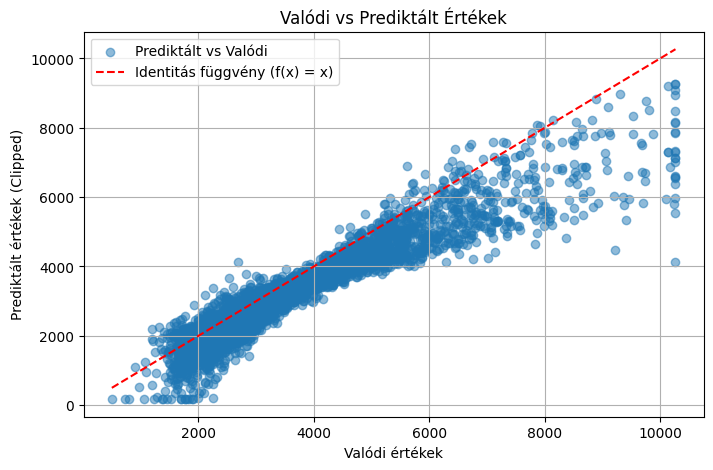

In [521]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_clipped, alpha=0.5, label="Prediktált vs Valódi")

# Identitás
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Identitás függvény (f(x) = x)")

plt.xlabel("Valódi értékek")
plt.ylabel("Prediktált értékek (Clipped)")
plt.title("Valódi vs Prediktált Értékek")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

RANDOM FOREST

In [522]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [523]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [524]:
param_grid = {
    "n_estimators": [100, 250],  # Number of trees
    "max_depth": [2, 4]  # Maximum depth of trees
}

In [525]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [526]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'n_estimators': [100, 250]},
             scoring='neg_mean_squared_error', verbose=2)

In [527]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [528]:
y_pred_rf = best_model.predict(X_test)

In [529]:
y_pred_rf_clipped = numpy.clip(y_pred_rf, y_min, y_max) #értelmezési tartomány ne legyen nagyobb

In [530]:
mape = mean_absolute_percentage_error(y_test, y_pred_rf_clipped)
mape

0.12457543528812538

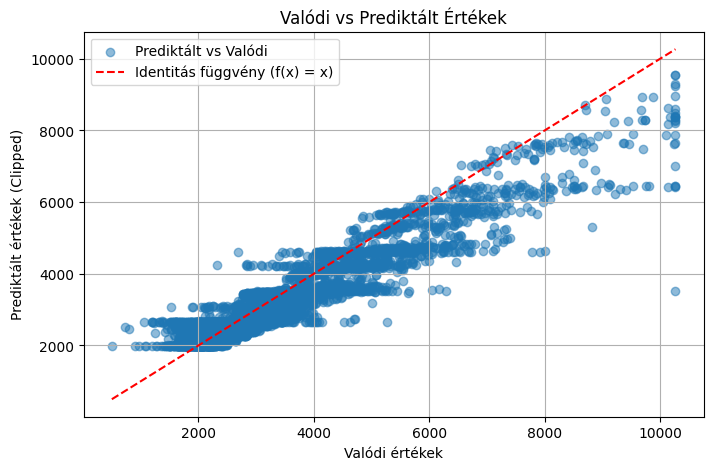

In [531]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf_clipped, alpha=0.5, label="Prediktált vs Valódi")

# Identitás
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Identitás függvény (f(x) = x)")

plt.xlabel("Valódi értékek")
plt.ylabel("Prediktált értékek (Clipped)")
plt.title("Valódi vs Prediktált Értékek")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

GBM REGRESSOR

In [532]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [533]:
gbm_model = GradientBoostingRegressor(random_state=42)

In [534]:
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [2, 4]
}

In [535]:
grid_search_gbm = GridSearchCV(
    estimator=gbm_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error", 
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [536]:
grid_search_gbm.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'n_estimators': [200, 400]},
             scoring='neg_mean_squared_error', verbose=2)

In [537]:
best_params_gbm = grid_search_gbm.best_params_
best_model_gbm = grid_search_gbm.best_estimator_

In [538]:
y_pred_gbm = best_model_gbm.predict(X_test)

In [539]:
y_pred_gbm_clipped = numpy.clip(y_pred_gbm, y_min, y_max) #értelmezési tartomány ne legyen nagyobb

In [540]:
mape = mean_absolute_percentage_error(y_test, y_pred_gbm_clipped)
mape

0.04641268668375157

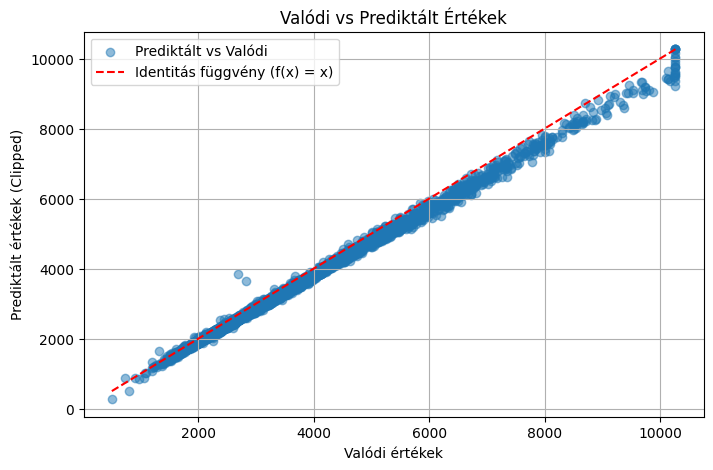

In [541]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gbm_clipped, alpha=0.5, label="Prediktált vs Valódi")

# Identitás
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Identitás függvény (f(x) = x)")

plt.xlabel("Valódi értékek")
plt.ylabel("Prediktált értékek (Clipped)")
plt.title("Valódi vs Prediktált Értékek")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [542]:
avg_lin_rf = (y_pred + y_pred_rf) / 2  # Linear Regression + Random Forest
avg_lin_gbm = (y_pred + y_pred_gbm) / 2  # Linear Regression + GBM
avg_rf_gbm = (y_pred_rf + y_pred_gbm) / 2  # Random Forest + GBM
avg_all = (y_pred + y_pred_rf + y_pred_gbm) / 3 

In [543]:
mape_lin_rf = mean_absolute_percentage_error(y_test, avg_lin_rf)
mape_lin_gbm = mean_absolute_percentage_error(y_test, avg_lin_gbm)
mape_rf_gbm = mean_absolute_percentage_error(y_test, avg_rf_gbm)
mape_all = mean_absolute_percentage_error(y_test, avg_all)

print(mape_lin_rf)
print(mape_lin_gbm)
print(mape_rf_gbm)
print(mape_all)

0.09449348414133416
0.0878902958610378
0.07115540099070146
0.0743973590770629


In [544]:
mape_values = {
    "LinReg + RandomForest": mape_lin_rf,
    "LinReg + GradientBoosting": mape_lin_gbm,
    "RandomForest + GradientBoosting": mape_rf_gbm,
    "All Three Models": mape_all
}

model_names = list(mape_values.keys())
mape_scores = list(mape_values.values())

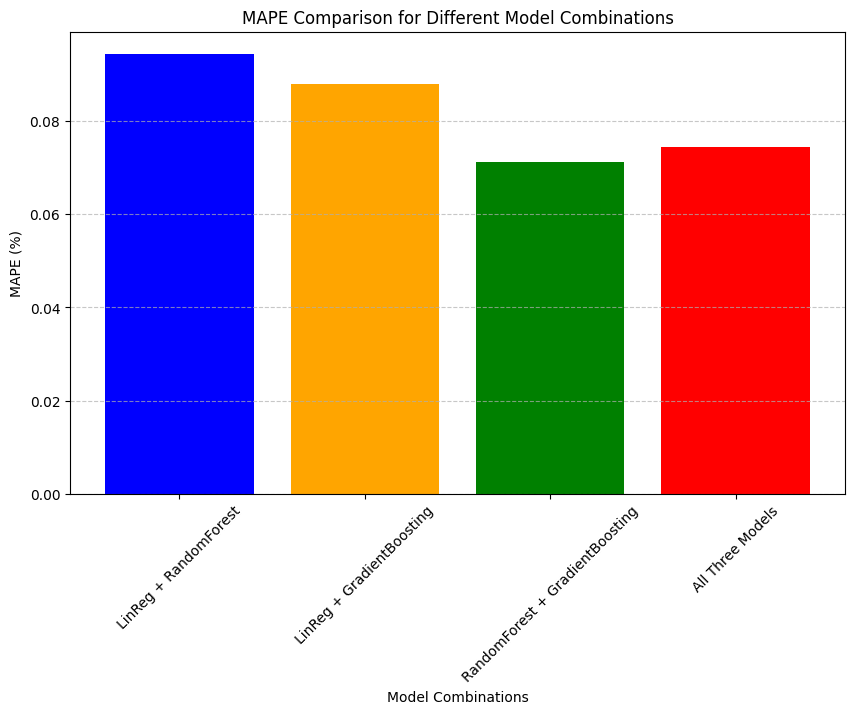

In [545]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, mape_scores, color=['blue', 'orange', 'green', 'red'])

# Labels and title
plt.xlabel("Model Combinations")
plt.ylabel("MAPE (%)")
plt.title("MAPE Comparison for Different Model Combinations")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [546]:
y_pred_2025_linreg = model.predict(X_deploy)

In [547]:
y_pred_2025_linreg_clipped = numpy.clip(y_pred_2025_linreg, y_min, y_max) #értelmezési tartomány ne legyen nagyobb

In [548]:
y_pred_2025_linreg_clipped

array([3086.83538064, 1822.54059338, 3010.84654172, ..., 3216.49811767,
       3351.04644545, 3728.80061896])

In [549]:
y_pred_2025_rf = best_model.predict(X_deploy)

In [550]:
y_pred_2025_rf_clipped = numpy.clip(y_pred_2025_rf, y_min, y_max) #értelmezési tartomány ne legyen nagyobb

In [551]:
y_pred_2025_rf_clipped

array([2769.48548747, 2531.32014692, 4608.39589694, ..., 2795.82422809,
       4603.59332877, 6223.20072499])

In [552]:
y_pred_2025_gbm = best_model_gbm.predict(X_deploy)

In [553]:
y_pred_2025_gbm_clipped = numpy.clip(y_pred_2025_gbm, y_min, y_max) #értelmezési tartomány ne legyen nagyobb

In [554]:
y_pred_2025_gbm_clipped

array([3060.25889504, 2347.47236688, 4068.00132965, ..., 3668.44009657,
       3961.47255236, 6049.52278001])

In [555]:
X_deploy.head()

,rowid,year,month,iprice,number_of_bedrooms,number_of_bathrooms,number_of_garage,land_area,floor_area,build_year,CBD_distance,nearest_station_distance,postcode,lat_coord,long_coord,nearest_school_distance,nearest_school_rank
8,8,2025.0,6,538000.0,4.0,2.0,3.0,875.0,168.0,1983.0,12100,2500.0,6022.0,-31.847760,115.822700,1.221928,68.0
17,17,2025.0,10,538000.0,4.0,2.0,2.0,568.0,225.0,2003.0,15300,7000.0,6057.0,-31.952420,116.020700,2.746772,137.0
32,32,2025.0,12,538000.0,4.0,2.0,2.0,550.0,127.0,1999.0,46800,4300.0,6172.0,-32.362590,115.751700,2.016748,68.0
38,38,2025.0,11,538000.0,4.0,2.0,2.0,469.0,152.0,2008.0,19000,5700.0,6112.0,-32.115989,115.917327,1.784415,62.0
44,44,2025.0,12,538000.0,3.0,2.0,2.0,397.0,130.0,2006.0,38000,372.0,6036.0,-31.638689,115.700206,1.652202,39.0


In [556]:
y_pred_2025_gbm_clipped = y_pred_2025_gbm_clipped * X_deploy['floor_area']

In [557]:
end_df = X_deploy

In [558]:
end_df['pred'] = y_pred_2025_gbm_clipped

C:\Users\User\AppData\Local\Temp\ipykernel_19804\1956589463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_df['pred'] = y_pred_2025_gbm_clipped


In [559]:
end_df.head()

,rowid,year,month,iprice,number_of_bedrooms,number_of_bathrooms,number_of_garage,land_area,floor_area,build_year,CBD_distance,nearest_station_distance,postcode,lat_coord,long_coord,nearest_school_distance,nearest_school_rank,pred
8,8,2025.0,6,538000.0,4.0,2.0,3.0,875.0,168.0,1983.0,12100,2500.0,6022.0,-31.847760,115.822700,1.221928,68.0,514123.494366
17,17,2025.0,10,538000.0,4.0,2.0,2.0,568.0,225.0,2003.0,15300,7000.0,6057.0,-31.952420,116.020700,2.746772,137.0,528181.282549
32,32,2025.0,12,538000.0,4.0,2.0,2.0,550.0,127.0,1999.0,46800,4300.0,6172.0,-32.362590,115.751700,2.016748,68.0,516636.168865
38,38,2025.0,11,538000.0,4.0,2.0,2.0,469.0,152.0,2008.0,19000,5700.0,6112.0,-32.115989,115.917327,1.784415,62.0,505205.139160
44,44,2025.0,12,538000.0,3.0,2.0,2.0,397.0,130.0,2006.0,38000,372.0,6036.0,-31.638689,115.700206,1.652202,39.0,515258.741917


In [560]:
df_predictions = end_df[['rowid', 'pred']]

In [561]:
df_predictions.head()

,rowid,pred
8,8,514123.494366
17,17,528181.282549
32,32,516636.168865
38,38,505205.139160
44,44,515258.741917


In [562]:
df_predictions['pred'].mean()

516603.0724277696

In [563]:
df_predictions.to_csv("predictions_2025_gbm.csv", index=False)

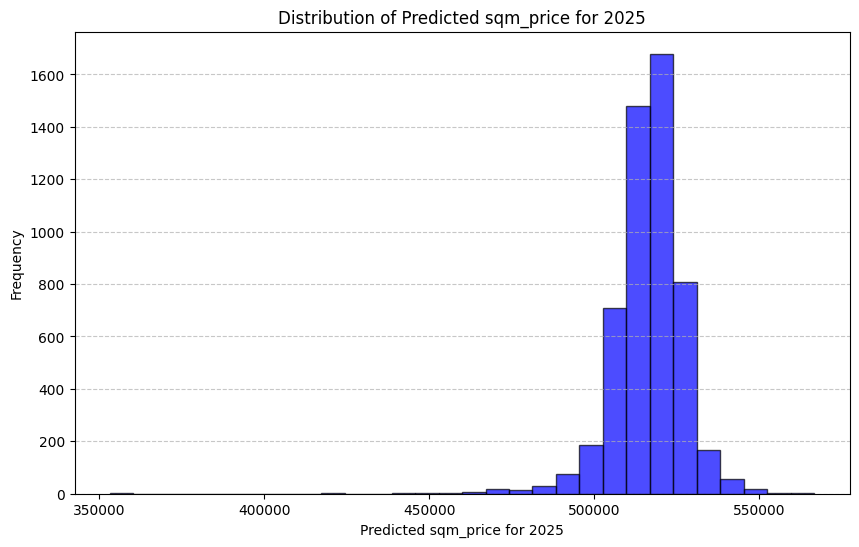

In [564]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_2025_gbm_clipped, bins=30, alpha=0.7, color='blue', edgecolor='black')

plt.xlabel("Predicted sqm_price for 2025")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted sqm_price for 2025")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

A megoldással 0.3143 értéket értem el a leaderboardon